# Feature Engineering and Data Preparation

## Importance of Data Preparation
Hi, in this lesson, you will discover the importance of data preparation in predictive modeling with machine learning.

Predictive modeling projects involve learning from data.
Data refers to examples or cases from the domain that characterizes the problem you want to solve.
On a predictive modeling project, such as classification or regression, raw data typically cannot be used directly.
There are four main reasons why this is the case:
Data Types: Machine learning algorithms require data to be numbers.
Data Requirements: Some machine learning algorithms impose requirements on the data.
Data Errors: Statistical noise and errors in the data may need to be corrected.
Data Complexity: Complex nonlinear relationships may be teased out of the data.
The raw data must be pre-processed prior to being used to fit and evaluate a machine learning model. This step in a predictive modeling project is referred to as data preparation.
There are common or standard tasks that you may use or explore during the data preparation step in a machine learning project.
These tasks include:
1. Data Cleaning: Identifying and correcting mistakes or errors in the data.
2. Feature Selection: Identifying those input variables that are most relevant to the task.
3. Data Transforms: Changing the scale or distribution of variables.
4. Feature Engineering: Deriving new variables from available data.
5. Dimensionality Reduction: Creating compact projections of the data.

## Feature Engineering
Features are allocated scores and can then be ranked by their scores. Those features with the highest scores can be selected for inclusion in the training dataset, whereas those remaining can be ignored. Feature selection is primarily focused on removing non-informative or redundant predictors from the model.

1. In computer vision, an image is an observation, but a feature could be a line in the image. In natural language processing, a document or a tweet could be an observation, and a phrase or word count could be a feature. In speech recognition, an utterance could be an observation, but a feature might be a single word or phoneme.

2. More complex predictive modeling algorithms perform feature importance and selection internally while constructing their model. Some examples include MARS, Random Forest and Gradient Boosted Machines. These models can also report on the variable importance determined during the model preparation process.

Feature extraction is a process of automatically reducing the dimensionality of these types of observations into a much smaller set that can be modelled.

1. For tabular data, this might include projection methods like Principal Component Analysis and unsupervised clustering methods. For image data, this might include line or edge detection. Depending on the domain, image, video and audio observations lend themselves to many of the same types of DSP methods.

2. Key to feature extraction is that the methods are automatic (although may need to be designed and constructed from simpler methods) and solve the problem of unmanageably high dimensional data, most typically used for analog observations stored in digital formats.

A picture relevant to our discussion on feature engineering is the front-middle of this process. It might look something like the following:

1. (tasks before here…)
2. Select Data: Integrate data, de-normalize it into a dataset, collect it together.
3. Preprocess Data: Format it, clean it, sample it so you can work with it.
4. Transform Data: Feature Engineer happens here.
5. Model Data: Create models, evaluate them and tune them.
6. (tasks after here…)
The traditional idea of “Transforming Data” from a raw state to a state suitable for modeling is where feature engineering fits in. Transform data and feature engineering may in fact be synonyms.

###  Feature Selection Methods
There are two main types of feature selection techniques:

- Unsupervised methods: Unsupervised feature selection techniques ignores the target variable, such as methods that remove redundant variables using correlation. 
- Supervised methods: Supervised feature selection techniques use the target variable, such as methods that remove irrelevant variables for example wrapper, filter and intrinsic.

A. Feature selection using regularization:
– L0 regularisation
– L1 regularisation 
– L2 regularisation
– L1/2 regularization

B. Feature selection using wrappers.
1.  Wrappers: Search for well-performing subsets of features.
- Wrapper feature selection methods create many models with different subsets of input features and select those features that result in the best performing model according to a performance metric. These methods are unconcerned with the variable types, although they can be computationally expensive. RFE is a good example of a wrapper feature selection method.

2. Backward selection wrapper:
– Start with all features.
– Try removing each feature and measure validation set impact.
– Remove the feature that causes the least harm.
– Repeat.

3. Notes:
– There are many variants (forward, backtracking, etc.)
– Risk of overfitting the validation set.
– Computationally expensive.
– Quite effective in practice.

C. Feature selection using greedy algorithms.
Algorithms that incorporate features one by one.
1. Decision trees: 
– Each decision can be seen as a feature.
– Pruning the decision tree prunes the features

2. Ensembles: 
– Ensembles of classifiers involving few features.
– Random forests.
– Boosting.

D. Filter-based feature selection methods:
1. Use statistical measures to score the correlation or dependence between input variables that can be filtered to choose the most relevant features. 
2. Statistical measures for feature selection must be carefully chosen based on the data type of the input variable and the output or response variable.

E. Intrinsic feature selection based on ML algorithms
- some models contain built-in feature selection, meaning that the model will only include predictors that help maximize accuracy. In these cases, the model can pick and choose which representation of the data is best.
- Such as penalized regression models like Lasso and decision trees, including ensembles of decision trees like random forest.

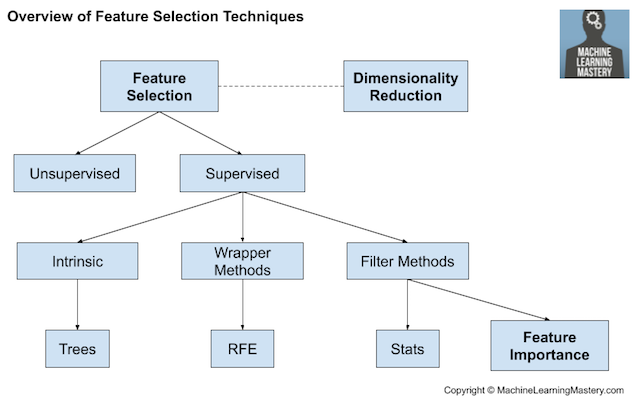
Problems:

-Redundant features (correlated features will all have similar weights)

-Dependant features (some features may only be important in
combination)


### 2. Statistics for Filter Feature Selection Methods
Numerical Input, Numerical Output
Numerical Input, Categorical Output
Categorical Input, Numerical Output
Categorical Input, Categorical Output

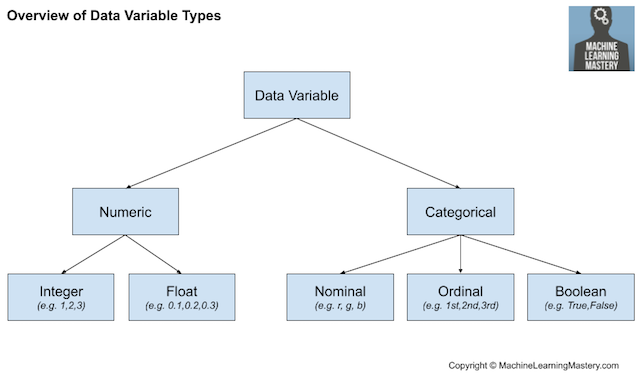

### 3. Tips and Tricks for Feature Selection
- A. Correlation Statistics:

  _ The scikit-learn library provides an implementation of most of the useful statistical measures.
  1. Pearson’s Correlation Coefficient: f_regression()
  2. ANOVA: f_classif()
  3. Chi-Squared: chi2()
  4. Mutual Information: mutual_info_classif() and mutual_info_regression()
  
  _ The SciPy library provides an implementation of many more statistics, such as: 
  1. Kendall’s tau (kendalltau) 
  2. Spearman’s rank correlation (spearmanr).
   
   
- B. Selection Method

   1. Select the top k variables: SelectKBest
   2. Select the top percentile variables: SelectPercentile
 
 
- C. Transform Variables/

  __Consider transforming the variables in order to access different statistical method.
  
  
- D. What Is the Best Method?

 __There is no best feature selection method. you must discover what works best for your specific problem using careful systematic experimentation.

In [70]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# creates the regression dataset,
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 10)


In [75]:
#Classification Feature Selection: (Numerical Input, Categorical Output)
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=2)
# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 2)


### Select Features With RFE (Recursive Feature Elimination)
Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm.

RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

The scikit-learn Python machine learning library provides an implementation of RFE for machine learning. RFE is a transform. To use it, first, the class is configured with the chosen algorithm specified via the estimator argument and the number of features to select via the n_features_to_select argument.

The example below defines a synthetic classification dataset with five redundant input features. RFE is then used to select five features using the decision tree algorithm. 

In [72]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=False, Rank: 5
Column: 1, Selected=False, Rank: 4
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 6
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=False, Rank: 2
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=False, Rank: 3


In [74]:
df= pd.DataFrame(X, y)
df.corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.110794,-0.271183,-0.349202,0.673178,-0.694622,-0.835192,-0.444818,-0.105601,-0.373294
1,0.110794,1.000000,-0.253191,0.712969,0.087511,-0.032118,-0.079680,0.654958,-0.261978,0.461686
2,-0.271183,-0.253191,1.000000,-0.400535,-0.747995,0.378240,-0.124561,-0.023101,0.583669,0.548288
3,-0.349202,0.712969,-0.400535,1.000000,-0.013449,0.399891,0.277880,0.695988,-0.554515,0.249617
4,0.673178,0.087511,-0.747995,-0.013449,1.000000,-0.811627,-0.257232,-0.064416,-0.666790,-0.399493
5,-0.694622,-0.032118,0.378240,0.399891,-0.811627,1.000000,0.239326,0.077157,0.263736,0.107534
6,-0.835192,-0.079680,-0.124561,0.277880,-0.257232,0.239326,1.000000,0.472162,-0.056362,0.234074
7,-0.444818,0.654958,-0.023101,0.695988,-0.064416,0.077157,0.472162,1.000000,-0.476627,0.793224
8,-0.105601,-0.261978,0.583669,-0.554515,-0.666790,0.263736,-0.056362,-0.476627,1.000000,-0.003629
9,-0.373294,0.461686,0.548288,0.249617,-0.399493,0.107534,0.234074,0.793224,-0.003629,1.000000


## Fill Missing Values With Imputation
Data can have missing values for a number of reasons, such as observations that were not recorded and data corruption. Handling missing data is important as many machine learning algorithms do not support data with missing values.

Filling missing values with data is called data imputation and a popular approach for data imputation is to calculate a statistical value for each column (such as a mean) and replace all missing values for that column with the statistic.

The horse colic dataset describes the medical characteristics of horses with colic and whether they lived or died. It has missing values marked with a question mark '?'. We can load the dataset with the read_csv() function and ensure that question mark values are marked as NaN.
### 1. Fill Missing Values using SimpleImputer 
Once loaded, we can use the SimpleImputer class to transform all missing values marked with a NaN value with the mean of the column.

The complete example is listed below.

In [49]:
# statistical imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))

Missing: 1605


In [50]:
# define imputer
imputer = SimpleImputer(strategy='mean')
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 0


### 2. KNN Imputation for Missing Values in Machine Learning;
One popular technique for imputation is a K-nearest neighbor model. A new sample is imputed by finding the samples in the training set “closest” to it and averages these nearby points to fill in the value.

 a. The default distance measure is a Euclidean distance measure that is NaN aware, e.g. will not include NaN values when calculating the distance between members of the training dataset. This is set via the “metric” argument.

 b. The number of neighbors is set to five by default and can be configured by the “n_neighbors” argument.

 c. Finally, the distance measure can be weighed proportional to the distance between instances (rows), although this is set to a uniform weighting by default, controlled via the “weights” argument. 

1. Define imputer: imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

 Then, the imputer is fit on a dataset. 
2. Fit on the dataset: imputer.fit(X)

 Then, the fit imputer is applied to a dataset to create a copy of the dataset with all missing values for each column replaced with an estimated value
3. Transform the dataset: Xtrans = imputer.transform(X)

In [51]:
# summarize the horse colic dataset
from pandas import read_csv
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
#We load the dataset and specify the “na_values” to load values of ‘?’ as missing, marked with a NaN value.
dataframe = read_csv(url, header=None, na_values='?')
# summarize the first few rows
print(dataframe.head())

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]


In [52]:
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
	# count number of rows with missing values
	n_miss = dataframe[[i]].isnull().sum()
	perc = n_miss / dataframe.shape[0] * 100
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, Missing: 55 (18.3%)
> 11, Missing: 44 (14.7%)
> 12, Missing: 56 (18.7%)
> 13, Missing: 104 (34.7%)
> 14, Missing: 106 (35.3%)
> 15, Missing: 247 (82.3%)
> 16, Missing: 102 (34.0%)
> 17, Missing: 118 (39.3%)
> 18, Missing: 29 (9.7%)
> 19, Missing: 33 (11.0%)
> 20, Missing: 165 (55.0%)
> 21, Missing: 198 (66.0%)
> 22, Missing: 1 (0.3%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)


In [53]:
# knn imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


##### 2.a KNNImputer Transform When Making a Prediction
We may wish to create a final modeling pipeline with the nearest neighbor imputation and random forest algorithm, then make a prediction for new data.

This can be achieved by defining the pipeline and fitting it on all available data, then calling the predict() function, passing new data in as an argument.

Importantly, the row of new data must mark any missing values using the NaN value.

In [54]:
# evaluate knn imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
# fit the model
pipeline.fit(X, y)
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]
# make a prediction
yhat = pipeline.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Mean Accuracy: 0.858 (0.057)
Predicted Class: 2


### 3.  Scale Data With Normalization
Many machine learning algorithms perform better when numerical input variables are scaled to a standard range.

This includes algorithms that use a weighted sum of the input, like linear regression and algorithms that use distance measures, like k-nearest neighbors.

One of the most popular techniques for scaling numerical data prior to modeling is normalization. Normalization scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision. It requires that you know or are able to accurately estimate the minimum and maximum observable values for each variable. You may be able to estimate these values from your available data.

You can normalize your dataset using the scikit-learn object MinMaxScaler.
A value is normalized as follows:

- y = (x – min) / (max – min)

In [59]:
# example of normalizing input data
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
# define dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, random_state=1)
# summarize data before the transform
print('X:', X[:3, :])
# define the scaler
trans = MinMaxScaler()
# transform the data
X_norm = trans.fit_transform(X)
# summarize data after the transform
print('X_norm:', X_norm[:3, :])

X: [[ 2.39324489 -5.77732048 -0.59062319 -2.08095322  1.04707034]
 [-0.45820294  1.94683482 -2.46471441  2.36590955 -0.73666725]
 [ 2.35162422 -1.00061698 -0.5946091   1.12531096 -0.65267587]]
X_norm: [[0.77608466 0.0239289  0.48251588 0.18352101 0.59830036]
 [0.40400165 0.79590304 0.27369632 0.6331332  0.42104156]
 [0.77065362 0.50132629 0.48207176 0.5076991  0.4293882 ]]


### 4. How to Use StandardScaler Transforms in Python 
Standardization calculates  the statistical mean and standard deviation of the attribute values, subtract the mean from each value, and divide the result by the standard deviation and scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one. A value is standardized as follows:

- y = (x – mean) / standard_deviation
Where the mean is calculated as:

mean = sum(x) / count(x)
And the standard_deviation is calculated as:

- standard_deviation = sqrt( sum( (x – mean)^2 ) / count(x))

In [60]:
# example of normalizing input data
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
# define dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, random_state=1)
# summarize data before the transform
print('X:', X[:3, :])
# define the scaler
trans = StandardScaler()
# transform the data
X_norm = trans.fit_transform(X)
# summarize data after the transform
print('X_norm:', X_norm[:3, :])

X: [[ 2.39324489 -5.77732048 -0.59062319 -2.08095322  1.04707034]
 [-0.45820294  1.94683482 -2.46471441  2.36590955 -0.73666725]
 [ 2.35162422 -1.00061698 -0.5946091   1.12531096 -0.65267587]]
X_norm: [[ 1.67152475 -4.00938431 -0.02146232 -2.01058854  0.97742549]
 [-0.33677098  0.94960782 -1.17380472  0.88773515 -0.13654955]
 [ 1.64221101 -0.94268846 -0.02391318  0.07915245 -0.08409548]]


### Q. Should I Normalize or Standardize?
Whether input variables require scaling depends on the specifics of your problem and of each variable.

You may have a sequence of quantities as inputs, such as prices or temperatures.

- If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized. This applies if the range of quantity values is large (10s, 100s, etc.) or small (0.01, 0.0001).

- If the quantity values are small (near 0-1) and the distribution is limited (e.g. standard deviation near 1), then perhaps you can get away with no scaling of the data.

- We should not do the scaling for one-hot-encoded variables.

### 5. Transform Categories With One Hot Encoding
Machine learning models require all input and output variables to be numeric. This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.

One of the most popular techniques for transforming categorical variables into numbers is the one hot encoding.

Categorical data are variables that contain label values rather than numeric values.

Each label for a categorical variable can be mapped to a unique integer, called an ordinal encoding. Then, a one hot encoding can be applied to the ordinal representation. This is where one new binary variable is added to the dataset for each unique integer value in the variable, and the original categorical variable is removed from the dataset.

For example, imagine we have a color variable with three categories (red, green, and blue). In this case, three binary variables are needed. A "1" value is placed in the binary variable for the color and "0" values for the other colors.

This one hot encoding transform is available in the scikit-learn Python machine learning library via the OneHotEncoder class.

The breast cancer dataset contains only categorical input variables.
The example below loads the dataset and one hot encodes each of the categorical input variables.

In [61]:
# one hot encode the breast cancer dataset
from pandas import read_csv
from sklearn.preprocessing import OneHotEncoder
# define the location of the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
# load the dataset
dataset = read_csv(url, header=None)
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X_1= data[:, :2].astype(str)
X_oe= data[:, 2:-1].astype(str)
y = data[:, -1].astype(str)
# summarize the raw data
print(X[:3, :])
# define the one hot encoding transform
encoder = OneHotEncoder(sparse=False)
# fit and apply the transform to the input data
X_oe = encoder.fit_transform(X_oe)
# summarize the transformed data
print('X_oe:', X_oe[:3, :])

[[ 2.39324489 -5.77732048 -0.59062319 -2.08095322  1.04707034]
 [-0.45820294  1.94683482 -2.46471441  2.36590955 -0.73666725]
 [ 2.35162422 -1.00061698 -0.5946091   1.12531096 -0.65267587]]
X_oe: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
  0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
  0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]]


In [62]:
df1 = pd.DataFrame(X_1)
df2 = pd.DataFrame(X_oe)
df2

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
282,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
283,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
284,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
df= df1.append(df2)
df

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,'40-49','premeno',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'50-59','ge40',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'50-59','ge40',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'40-49','premeno',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'40-49','premeno',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
282,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
283,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
284,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### 6. Transform Numbers to Categories With kBins

Some machine learning algorithms may prefer or require categorical or ordinal input variables, such as some decision tree and rule-based algorithms.

This could be caused by outliers in the data, multi-modal distributions, highly exponential distributions, and more.

Many machine learning algorithms prefer or perform better when numerical input variables with non-standard distributions are transformed to have a new distribution or an entirely new data type.

One approach is to use the transform of the numerical variable to have a discrete probability distribution where each numerical value is assigned a label and the labels have an ordered (ordinal) relationship.

This is called a discretization transform and can improve the performance of some machine learning models for datasets by making the probability distribution of numerical input variables discrete.

The discretization transform is available in the scikit-learn Python machine learning library via the KBinsDiscretizer class.

It allows you to specify the number of discrete bins to create (n_bins), whether the result of the transform will be an ordinal or one hot encoding (encode), and the distribution used to divide up the values of the variable (strategy), such as 'uniform'.

The example below creates a synthetic input variable with 10 numerical input variables, then encodes each into 10 discrete bins with an ordinal encoding
 

In [65]:
# discretize numeric input variables
from sklearn.datasets import make_classification
from sklearn.preprocessing import KBinsDiscretizer
# define dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, random_state=1)
# summarize data before the transform
print('X:', X[:3, :])
# define the transform
# 'strategy' are ('uniform', 'quantile', 'kmeans').
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# transform the data
X_discrete = trans.fit_transform(X)
# summarize data after the transform
print('X_discrete:')
print( X_discrete[:3, :])

X: [[ 2.39324489 -5.77732048 -0.59062319 -2.08095322  1.04707034]
 [-0.45820294  1.94683482 -2.46471441  2.36590955 -0.73666725]
 [ 2.35162422 -1.00061698 -0.5946091   1.12531096 -0.65267587]]
X_discrete:
[[3. 0. 2. 0. 2.]
 [2. 3. 1. 3. 2.]
 [3. 2. 2. 2. 2.]]


(array([[ 69., 331., 338., 229.,  33.],
        [  9.,  62., 250., 533., 146.],
        [ 65., 259., 402., 237.,  37.],
        [ 29., 234., 485., 230.,  22.],
        [ 47., 371., 424., 136.,  22.]]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <a list of 5 Lists of Patches objects>)

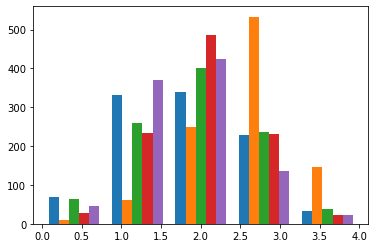

In [66]:
from matplotlib import pyplot
pyplot.hist(X_discrete, bins=5)

### 7. Dimensionality Reduction With PCA
The number of input variables or features for a dataset is referred to as its dimensionality. Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset. More input features often make a predictive modeling task more challenging to model, more generally referred to as the curse of dimensionality. 
Although on high-dimensionality statistics, dimensionality reduction techniques are often used for data visualization, these techniques can be used in applied machine learning to simplify a classification or regression dataset in order to better fit a predictive model. 

Perhaps the most popular technique for dimensionality reduction in machine learning is "Principal Component Analysis, or PCA" for short. This is a technique that comes from the field of linear algebra and can be used as a data preparation technique to create a projection of a dataset prior to fitting a model.

The resulting dataset, the projection, can then be used as input to train a machine learning model. The scikit-learn library provides the PCA class that can be fit on a dataset and used to transform a training dataset and any additional datasets in the future.

The example below creates a synthetic binary classification dataset with 10 input variables then uses PCA to reduce the dimensionality of the dataset to the three most important components.

In [67]:
# example of pca for dimensionality reduction
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
# define dataset
X, y = make_regression(n_samples=100, n_features=10, n_informative=3, n_targets=1, random_state=None)
# X, y = make_classification(n_samples=1000, n_features=12, n_informative=3, n_redundant=10, random_state=1)
# summarize data before the transform
print(X[:3, :])
# define the transform
trans = PCA(n_components=3)
# transform the data
X_dim = trans.fit_transform(X)
# summarize data after the transform
print(X_dim[:3, :])

[[-0.11355444 -0.70513064 -1.46873948  0.41680659  1.20686646 -0.16231567
  -1.83812433 -0.22189231  0.00570622  0.86511481]
 [-0.94415645 -0.35764307 -1.01268915 -0.47791036 -1.46998146 -1.09128201
  -0.2760817   0.47819442  0.13823064 -0.10970291]
 [-0.02330071  1.28378856  0.96069865 -0.21085312  0.09524995 -1.48818231
  -1.00194681  0.88739044 -0.66258153  1.04810904]]
[[-0.29966946  1.43301489  0.44084966]
 [-0.08631933  1.09376896 -0.15748353]
 [-0.93152899  0.81472803 -0.78993746]]
